# Unit 5 - Financial Planning

In [3]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import json
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [4]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [5]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [6]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [7]:
# Fetch current BTC price
btc_data = requests.get(btc_url).json()
btc_price = btc_data['data']['1']['quotes']['USD']['price']
# Fetch current ETH price
eth_data = requests.get(eth_url).json()
eth_price = eth_data['data']['1027']['quotes']['USD']['price']
# Compute current value of my crypto
my_btc_value = btc_price * my_btc
my_eth_value = my_eth * eth_price
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $24153.60
The current value of your 5.3 ETH is $7830.70


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [8]:
# Set current amount of shares
my_agg = 200
my_spy = 50


In [9]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv('ALPACA_API_KEY')
alpaca_secret_key = os.getenv('ALPACA_SECRET_KEY')
# Create the Alpaca API object
alpaca = tradeapi.REST(alpaca_api_key, alpaca_secret_key, api_version='v2')

In [10]:
# Format current date as ISO format
today = pd.Timestamp("2022-10-20", tz="America/New_York").isoformat()

# Set the tickers
tickers = ['AGG', 'SPY']

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current price data for SPY and AGG
portfolio = alpaca.get_bars(tickers, timeframe, start = today, end = today).df

# Reorganize the DataFrame and Separate ticker data
AGG = portfolio[portfolio['symbol']=='AGG'].drop('symbol', axis=1)
SPY = portfolio[portfolio['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
portfolio = pd.concat([AGG, SPY],axis=1, keys=['AGG','SPY'])

# Display sample data
portfolio

AGG                                    \
                            open     high      low  close   volume   
timestamp                                                            
2022-10-20 04:00:00+00:00  94.06  94.2555  93.5648  93.63  8860510   

                                                     SPY                  \
                          trade_count       vwap    open    high     low   
timestamp                                                                  
2022-10-20 04:00:00+00:00       19980  93.841305  368.07  372.67  364.61   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2022-10-20 04:00:00+00:00  365.41  87963935      634944  367.710482

In [11]:
# Pick AGG and SPY close prices
agg_close_price = float(portfolio['AGG']['close'])
spy_close_price = float(portfolio['SPY']['close'])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $93.63
Current SPY closing price: $365.41


In [12]:
# Compute the current value of shares
my_agg_value = agg_close_price * my_agg
my_spy_value = spy_close_price * my_spy
# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $18270.50
The current value of your 200 AGG shares is $18726.00


### Savings Health Analysis

In [13]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
crypto = my_btc_value + my_eth_value
shares = my_agg_value = my_spy_value
# Create savings DataFrame
savings_data = {'amounts':[crypto, shares]}
names = ['Crypto', 'Shares']
df_savings = pd.DataFrame(savings_data, index=names)
# Display savings DataFrame
df_savings.style.format('${:,.2f}')

,amounts
Crypto,"$31,984.30"
Shares,"$18,270.50"


array([<AxesSubplot:ylabel='amounts'>], dtype=object)

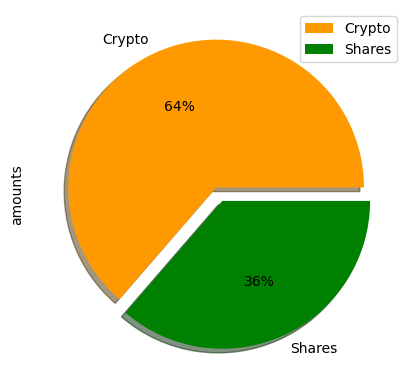

In [14]:
# Plot savings pie chart
df_savings.plot(kind='pie',shadow=True, colors= ['#FF9900', 'green'] , explode=(.05, .05), subplots=True, autopct='%1.0f%%')

In [15]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
savings = crypto + shares

# Validate saving health
if savings >= emergency_fund:
    print('Congrats! you have enough savings!')
elif savings == emergency_fund:
    print('You are close, just a little more in savings.')
elif savings <= emergency_fund:
    print('Oh no, you need more in savings!')


Congrats! you have enough savings!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [16]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2017-10-20', tz='America/Chicago').isoformat()
end_date = pd.Timestamp('2022-10-20', tz='America/Chicago').isoformat()

In [17]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = alpaca.get_bars(tickers, timeframe, start = start_date, end = end_date).df

# Reorganize the DataFrame
# Separate ticker data
AGG = df_stock_data[df_stock_data['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_stock_data[df_stock_data['symbol']=='SPY'].drop('symbol', axis=1)


# Concatenate the ticker DataFrames
df_stock_data = pd.concat([AGG, SPY],axis=1, keys=['AGG','SPY'])

# Display sample data
df_stock_data.head()

AGG                                     \
                             open     high      low   close   volume   
timestamp                                                              
2017-10-23 04:00:00+00:00  109.40  109.470  109.360  109.42  2024767   
2017-10-24 04:00:00+00:00  109.23  109.290  109.170  109.19  1722478   
2017-10-25 04:00:00+00:00  108.96  109.130  108.950  109.12  2945420   
2017-10-26 04:00:00+00:00  109.20  109.229  108.980  109.00  2163496   
2017-10-27 04:00:00+00:00  109.07  109.260  109.035  109.24  1904955   

                                                      SPY                    \
                          trade_count        vwap    open    high       low   
timestamp                                                                     
2017-10-23 04:00:00+00:00        9208  109.404970  257.51  257.51  256.0200   
2017-10-24 04:00:00+00:00        8486  109.230095  256.56  256.83  256.1500   
2017-10-25 04:00:00+00:00       12461  109.043379  256.23  256.31  254.0000   
2017-10-26 04:00:00+00:00        8113  109.051672  256.01  256.30  255.4800   
2017-10-27 04:00:00+00:00        8225  109.193461  256.47  257.89  255.6254   

                                                                      
                            close     volume trade_count        vwap  
timestamp                                                             
2017-10-23 04:00:00+00:00  256.11   64001716      196938  256.704266  
2017-10-24 04:00:00+00:00  256.56   69886571      193871  256.490281  
2017-10-25 04:00:00+00:00  255.29  103740803      318607  255.251326  
2017-10-26 04:00:00+00:00  255.62   71854886      178431  255.755127  
2017-10-27 04:00:00+00:00  257.71   85964044      230991  257.220580

In [18]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns

mc_30yr = MCSimulation(portfolio_data= df_stock_data,weights=[.40, .60], num_simulation= 500, num_trading_days= 252*30)


In [19]:
# Printing the simulation input data
mc_30yr.portfolio_data.head()

AGG                                     \
                             open     high      low   close   volume   
timestamp                                                              
2017-10-23 04:00:00+00:00  109.40  109.470  109.360  109.42  2024767   
2017-10-24 04:00:00+00:00  109.23  109.290  109.170  109.19  1722478   
2017-10-25 04:00:00+00:00  108.96  109.130  108.950  109.12  2945420   
2017-10-26 04:00:00+00:00  109.20  109.229  108.980  109.00  2163496   
2017-10-27 04:00:00+00:00  109.07  109.260  109.035  109.24  1904955   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2017-10-23 04:00:00+00:00        9208  109.404970          NaN  257.51   
2017-10-24 04:00:00+00:00        8486  109.230095    -0.002102  256.56   
2017-10-25 04:00:00+00:00       12461  109.043379    -0.000641  256.23   
2017-10-26 04:00:00+00:00        8113  109.051672    -0.001100  256.01   
2017-10-27 04:00:00+00:00        8225  109.193461     0.002202  256.47   

                                                                            \
                             high       low   close     volume trade_count   
timestamp                                                                    
2017-10-23 04:00:00+00:00  257.51  256.0200  256.11   64001716      196938   
2017-10-24 04:00:00+00:00  256.83  256.1500  256.56   69886571      193871   
2017-10-25 04:00:00+00:00  256.31  254.0000  255.29  103740803      318607   
2017-10-26 04:00:00+00:00  256.30  255.4800  255.62   71854886      178431   
2017-10-27 04:00:00+00:00  257.89  255.6254  257.71   85964044      230991   

                                                    
                                 vwap daily_return  
timestamp                                           
2017-10-23 04:00:00+00:00  256.704266          NaN  
2017-10-24 04:00:00+00:00  256.490281     0.001757  
2017-10-25 04:00:00+00:00  255.251326    -0.004950  
2017-10-26 04:00:00+00:00  255.755127     0.001293  
2017-10-27 04:00:00+00:00  257.220580     0.008176

In [20]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
mc_30yr.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/playb3yond40gb/PycharmProjects/FintechBootcamp/api_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.983226,0.989373,0.992803,0.993534,1.009543,0.994535,1.001552,0.991866,1.006158,1.006590,...,0.991794,1.016671,0.993050,1.001276,1.004002,0.999802,1.001039,1.010191,0.995243,1.002679
2,0.982226,0.997297,0.998776,0.991718,1.020034,0.994725,1.010289,0.994339,1.018304,1.012841,...,1.000052,1.028482,0.992649,0.998799,1.004920,1.001337,0.994447,1.000638,0.983419,1.003494
3,0.973169,0.997914,0.986847,0.984321,1.015717,0.986210,1.009507,1.006578,1.015442,1.015624,...,0.989790,1.028163,0.993769,0.997975,1.017542,0.989767,0.998046,1.008032,0.991302,1.004000
4,0.980724,1.006509,0.988001,0.997304,1.036601,0.992687,1.010002,1.007300,1.010919,1.004615,...,0.987077,1.028168,0.998618,0.994650,1.019045,0.998388,0.989304,1.005657,1.000740,0.994908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,2.348282,1.667042,2.828543,2.493817,2.017373,2.527345,3.088534,3.322979,4.169713,4.540882,...,1.642282,0.815297,3.006318,2.957606,2.796025,2.734031,1.543612,3.849466,3.294031,2.918409
7557,2.356341,1.674496,2.871141,2.498307,2.048154,2.537404,3.076756,3.298947,4.206677,4.534857,...,1.647748,0.820139,2.983007,2.982461,2.825825,2.713417,1.536508,3.832309,3.304470,2.893753
7558,2.399655,1.663383,2.894126,2.493826,2.037563,2.535689,3.090369,3.337111,4.147679,4.566232,...,1.651187,0.814981,2.979081,2.998857,2.831776,2.732057,1.522264,3.839002,3.300856,2.874898
7559,2.434758,1.641364,2.904895,2.505258,2.029322,2.555839,3.130655,3.333792,4.118749,4.528255,...,1.669631,0.811820,3.006210,3.011725,2.843689,2.766868,1.531984,3.882122,3.267354,2.895927


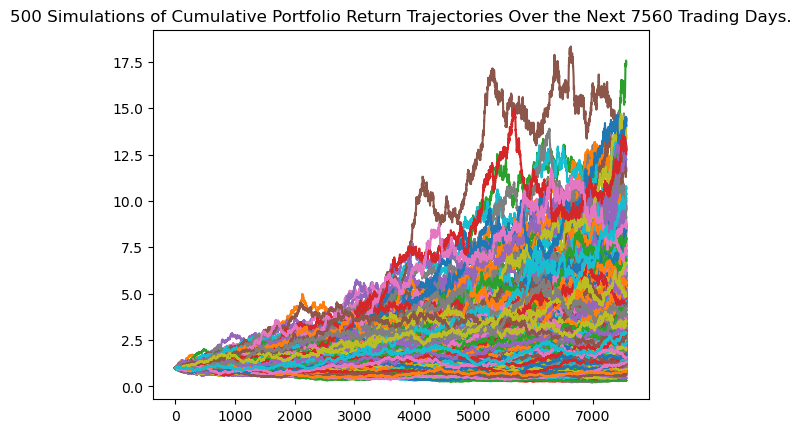

In [21]:
# Plot simulation outcomes
line_plot = mc_30yr.plot_simulation()

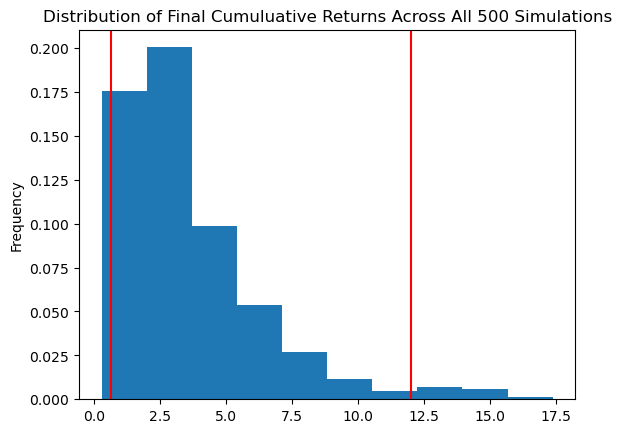

In [22]:
# Plot probability distribution and confidence intervals
dist_plot = mc_30yr.plot_distribution()

### Retirement Analysis

In [23]:
# Fetch summary statistics from the Monte Carlo simulation results
mc_summary = mc_30yr.summarize_cumulative_return()

# Print summary statistics
print(mc_summary)

count           500.000000
mean              3.678697
std               2.722372
min               0.300667
25%               1.781005
50%               2.965482
75%               4.719904
max              17.368608
95% CI Lower      0.656276
95% CI Upper     11.999006
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [24]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_upper = round(mc_summary[9]*initial_investment,2)
ci_lower = round(mc_summary[8]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $13125.52 and $239980.12


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [25]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_upper = round(mc_summary[9]*initial_investment,2)
ci_lower = round(mc_summary[8]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $19688.28 and $359970.19


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [26]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
mc_5yr = MCSimulation(portfolio_data= df_stock_data,weights=[.60, .40], num_simulation= 500, num_trading_days= 252*5)

In [27]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
mc_5yr.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/playb3yond40gb/PycharmProjects/FintechBootcamp/api_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.009865,1.000797,0.996228,1.000748,0.999505,0.995067,1.001910,1.003797,1.008423,0.998783,...,1.002177,0.996609,1.003105,1.001670,1.000571,1.006576,1.004845,0.997477,1.000016,0.995024
2,1.013530,1.000526,0.998122,0.999422,1.015688,1.000504,1.004980,0.999585,1.003968,1.008209,...,0.996033,0.985817,1.005767,1.003213,1.002803,1.009327,0.995601,0.999193,0.988964,0.996612
3,1.010588,1.000598,0.998061,0.997621,1.006619,0.999091,1.007218,0.991783,1.010901,1.007292,...,1.005129,0.994387,1.006008,1.003136,0.999087,0.996707,0.998729,0.994765,0.985121,0.997525
4,1.003656,0.993369,1.004125,1.000937,1.015098,0.992587,1.011711,0.992744,1.021747,1.001301,...,1.006512,0.994769,1.008848,0.997342,1.007630,0.988558,0.997147,0.992021,0.985068,0.989908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.958290,1.072116,1.175734,1.281952,1.011035,1.161610,0.975555,0.597682,1.320176,0.872960,...,1.250319,1.138581,1.286003,1.287343,1.120212,1.319584,1.356820,1.145257,1.149392,1.280881
1257,1.950162,1.074859,1.161030,1.265988,1.005884,1.161818,0.974143,0.589840,1.315143,0.870735,...,1.234456,1.139914,1.280857,1.286879,1.127377,1.314589,1.343361,1.156378,1.140781,1.283066
1258,1.938886,1.066732,1.155055,1.256189,1.001113,1.174650,0.971884,0.591230,1.304127,0.867491,...,1.229458,1.141853,1.268687,1.289156,1.127185,1.302026,1.346647,1.156706,1.138238,1.276518
1259,1.951995,1.084782,1.152819,1.249802,0.998890,1.174404,0.966898,0.594488,1.306133,0.880386,...,1.242029,1.130227,1.264682,1.284918,1.132260,1.306200,1.366910,1.142914,1.135860,1.278777


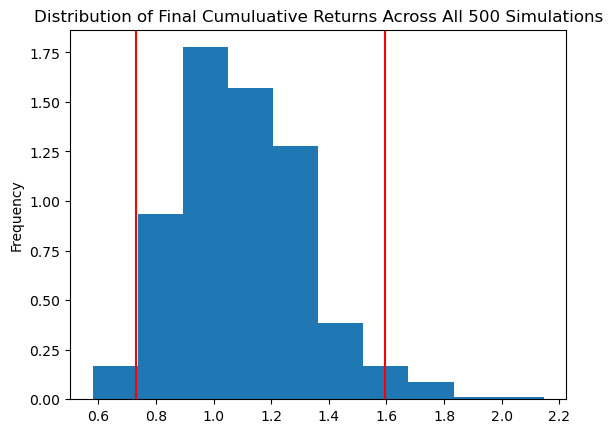

In [28]:
# Plot simulation outcomes
line_5yr = mc_5yr.plot_distribution()

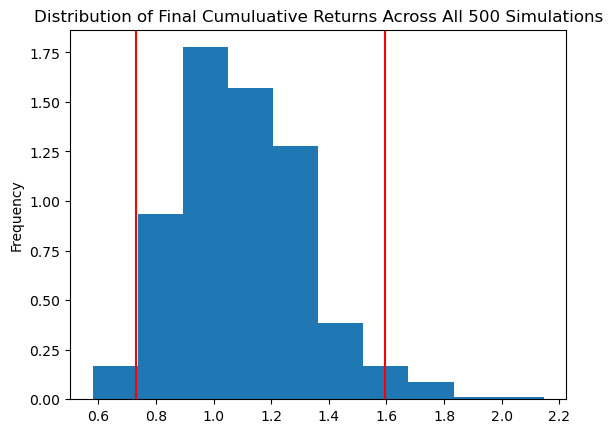

In [29]:
# Plot probability distribution and confidence intervals
dist_5yr = mc_5yr.plot_distribution()

In [30]:
# Fetch summary statistics from the Monte Carlo simulation results
mc_5yr_summary = mc_5yr.summarize_cumulative_return()

# Print summary statistics
print(mc_5yr_summary)

count           500.000000
mean              1.102730
std               0.224971
min               0.580657
25%               0.948070
50%               1.073160
75%               1.262173
max               2.146191
95% CI Lower      0.731717
95% CI Upper      1.596020
Name: 1260, dtype: float64


In [31]:
# Set initial investment
initial_investment_5 = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_upper_five = round(mc_5yr_summary[9] * initial_investment_5, 2)
ci_lower_five = round(mc_5yr_summary[8] * initial_investment_5, 2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 5 years will end within in the range of $43903.03 and $95761.23


### Ten Years Retirement Option

In [32]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
mc_10yr = MCSimulation(portfolio_data= df_stock_data,weights=[.60, .40], num_simulation= 500, num_trading_days= 252*10)

In [33]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
mc_10yr.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/playb3yond40gb/PycharmProjects/FintechBootcamp/api_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.989355,1.003622,0.990181,0.999772,0.994446,0.999337,0.993437,0.995727,0.997355,0.997131,...,0.999668,1.007799,1.014140,0.993153,0.998362,0.996457,1.002839,1.007753,1.006634,1.000756
2,0.984893,0.995463,0.989780,0.995151,0.982794,0.997094,1.000122,0.986373,1.003628,1.004392,...,1.007840,1.000416,1.014768,0.988019,1.002171,1.000884,1.002659,1.015669,1.010984,0.994221
3,0.996553,0.994486,0.985028,0.989147,0.987555,0.998431,1.004340,0.982664,1.002890,1.003983,...,1.009795,1.006708,1.006948,0.995768,1.001912,1.003359,0.998170,1.008676,1.012904,0.997256
4,0.999141,0.990508,0.987295,0.987741,0.987117,0.999329,1.008268,0.983213,1.003367,0.999149,...,1.007456,0.993630,1.011292,1.000532,1.000973,1.004669,0.991092,1.013546,1.012629,0.996614
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.145001,0.907302,1.037283,1.016566,2.006308,2.058778,1.253955,1.266047,0.676389,0.920170,...,0.714938,1.538461,1.842442,1.509670,1.372692,0.749862,1.768449,1.707884,1.307920,1.100062
2517,1.143518,0.901745,1.037924,1.013779,1.978767,2.054641,1.254037,1.255781,0.675000,0.925251,...,0.713368,1.548108,1.856629,1.526015,1.365916,0.742857,1.778051,1.722811,1.290248,1.098411
2518,1.139587,0.900163,1.048363,1.008966,1.997670,2.051034,1.260863,1.254037,0.673148,0.923689,...,0.710611,1.550626,1.859541,1.526047,1.383956,0.740076,1.780972,1.720165,1.296786,1.089939
2519,1.146644,0.901465,1.040958,0.999752,1.989823,2.046508,1.254151,1.253109,0.672553,0.911960,...,0.711862,1.554276,1.861628,1.533396,1.377799,0.747394,1.771571,1.717202,1.296072,1.094607


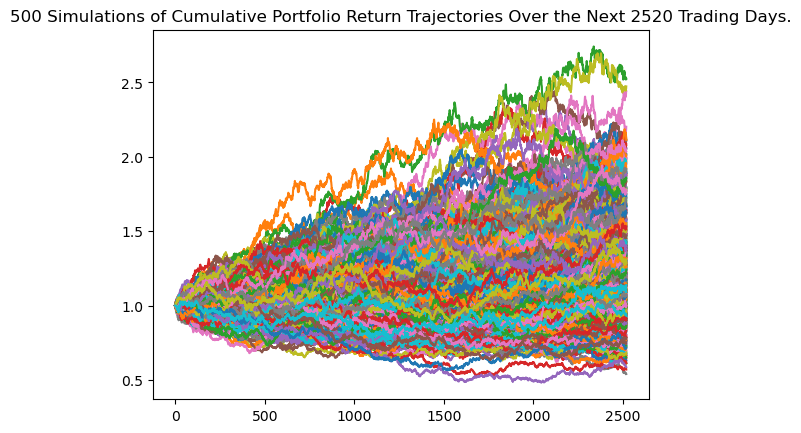

In [34]:
# Plot simulation outcomes
line_10yr = mc_10yr.plot_simulation()

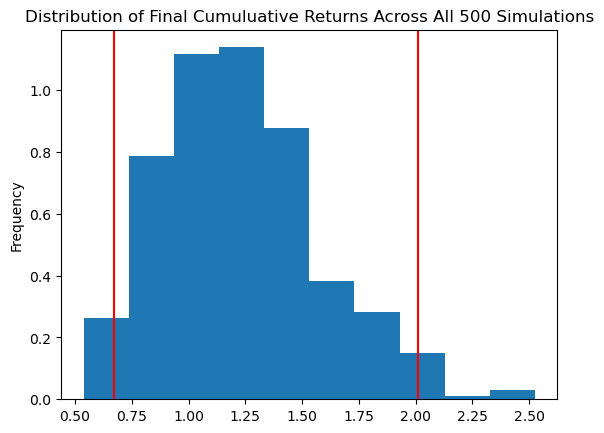

In [35]:
# Plot probability distribution and confidence intervals
dist_10yr = mc_10yr.plot_distribution()

In [36]:
# Fetch summary statistics from the Monte Carlo simulation results
mc_10yr_summary = mc_10yr.summarize_cumulative_return()

# Print summary statistics
print(mc_10yr_summary)

count           500.000000
mean              1.228213
std               0.345535
min               0.539383
25%               0.983452
50%               1.185217
75%               1.411617
max               2.524583
95% CI Lower      0.669532
95% CI Upper      2.007988
Name: 2520, dtype: float64


In [37]:
# Set initial investment
initial_investment_10 = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_upper_ten = round(mc_5yr_summary[9] * initial_investment_10, 2)
ci_lower_ten = round(mc_5yr_summary[8] * initial_investment_10, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 10 years will end within in the range of $43903.03 and $95761.23
